In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from contextlib import nullcontext
from cycler import cycler

In [2]:
df1 = pd.read_csv("../results/fig4_msd_1.csv", index_col=0).reset_index(drop=True)

In [3]:
df2 = pd.read_csv("../results/fig4_msd_2.csv", index_col=0).reset_index(drop=True)

In [4]:
df3 = pd.read_csv("../results/fig4_msd_3.csv", index_col=0).reset_index(drop=True)

In [5]:
df4 = pd.read_csv("../results/fig4_msd_4.csv", index_col=0).reset_index(drop=True)

In [6]:
df5 = pd.read_csv("../results/fig4_msd_5.csv", index_col=0).reset_index(drop=True)

In [7]:
df = pd.concat([df1, df2, df3, df4, df5])

In [8]:
df = df[df["alg"] != "N-MHSIC"]
df = df[df["alg"] != "N-MHSIC2"]
df = df[df["alg"] != "N-MHSIC4"]
df = df[df["alg"] != "N-MHSIC6"]


df = df.replace("N-MHSIC8", "N-MHSIC")
df = df.replace("HSIC", "V-HSIC")

In [9]:
df["alg"] = pd.Categorical(df["alg"],categories=["N-MHSIC", "NFSIC", "N-HSIC", "RFF-HSIC", "V-HSIC"])
df=df.sort_values("alg")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


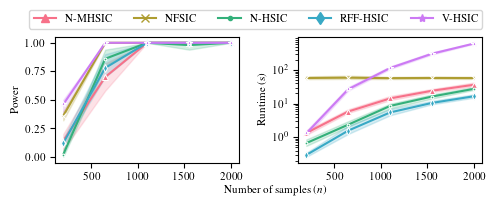

In [12]:
with nullcontext() as nc:
    default_cycler = (cycler(marker=['^','x', '.', 'd', '*']))

    plt.rc('axes', prop_cycle=default_cycler)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5,2))
    sns.lineplot(data=df,x="n", y="power", hue="alg", markersize=4, ax=ax1)
    sns.lineplot(data=df,x="n", y="runtime", hue="alg", markersize=4, ax=ax2)
    line, label = ax2.get_legend_handles_labels()
    l = ax2.get_legend()
    fig.legend(line, label, loc="upper center", bbox_to_anchor=(0.51, 1.09), ncol=5)
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax1.set_ylabel("Power")
    ax2.set_ylabel("Runtime (s)")
    ax1.set_xlabel("")
    ax2.set_xlabel("")
    fig.supxlabel("Number of samples ($n$)",va="top",y=0.18,x=0.55,fontsize=8)
    ax2.set_yscale("log")
    plt.tight_layout()
    plt.savefig("../article/figures/msd.eps", bbox_inches="tight")
    plt.savefig("../article/figures/msd.pdf", bbox_inches="tight")